In [1]:
.libPaths("/mnt/home/icb/laura.martens/miniconda3/envs/archr/lib/R/library")
library(Signac)
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(Matrix)
library(data.table)

In [3]:
setwd('/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/satpathy/signac/')
matrix <- readMM("../counts.mtx")
matrix <- t(matrix)

peaks <- fread('../peaks.csv', header=TRUE)
rownames(matrix) = peaks$peaks

barcodes <- fread('../barcodes.csv', header=TRUE)
colnames(matrix) = barcodes$barcodes

In [4]:
metadata <- fread('../metadata.csv', header=TRUE)
rownames(metadata) <- barcodes$barcodes

In [5]:
max(matrix)

[1] 57

In [6]:
chrom_assay <- CreateChromatinAssay(
  counts = matrix,
  sep = c(":", "-"),
  genome = 'hg38', #check that this is ok?
  min.cells = 0,
  min.features = 0
)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘IRanges’


The fol

In [7]:
chrom_assay

ChromatinAssay data with 134104 features for 63882 cells
Variable features: 0 
Genome: hg38 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 0 

In [8]:
atac <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata
)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_”


In [1]:
?FindTopFeatures

No documentation for ‘FindTopFeatures’ in specified packages and libraries:
you could try ‘??FindTopFeatures’

In [9]:
atac <- RunTFIDF(atac)
atac <- FindTopFeatures(atac, min.cutoff = 'q0')
atac <- RunSVD(atac)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



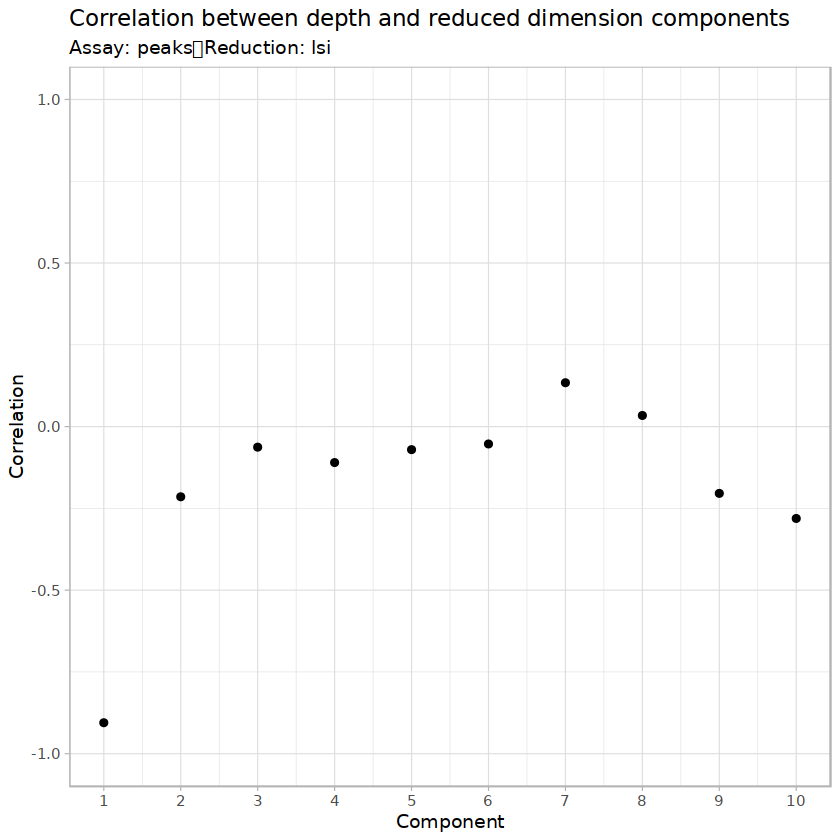

In [10]:
DepthCor(atac)

In [11]:
embedding = Embeddings(atac[['lsi']])[,2:30] #remove first component

In [12]:
write.csv(embedding, file = 'embedding.csv')

In [13]:
atac <- RunUMAP(object = atac, reduction = 'lsi', dims = 2:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:09:00 UMAP embedding parameters a = 0.9922 b = 1.112

15:09:00 Read 63882 rows and found 29 numeric columns

15:09:00 Using Annoy for neighbor search, n_neighbors = 30

15:09:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:09:06 Writing NN index file to temp file /tmp/RtmppQPrsA/file4e3e2348ce250

15:09:06 Searching Annoy index using 1 thread, search_k = 3000

15:09:25 Annoy recall = 100%

15:09:25 Commencing smooth kNN distance calibration using 1 thread

15:09:29 Initializing f

In [14]:
atac[[]]

,orig.ident,nCount_peaks,nFeature_peaks,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Internal_Name,Group_Barcode,cell_type
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
CAAGAAAGTCAAGACG-1,SeuratProject,15174,7364,-2.419656,7.603472,Cluster6,Bone_Marrow_Rep1,29301,0.3471895,SUHealthy_BM_B1_50,Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1,Pro-B
AATGCCATCGCACAAT-1,SeuratProject,3592,1911,5.676727,-9.210454,Cluster20,Bone_Marrow_Rep1,7534,0.2909477,SUHealthy_BM_B1_51,Bone_Marrow_Rep1#AATGCCATCGCACAAT-1,Mature-NK2
AAAGGGCAGTACCCAT-1,SeuratProject,21377,9864,-7.153399,-5.512960,Cluster11,Bone_Marrow_Rep1,29608,0.4491860,SUHealthy_BM_B1_52,Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1,cDC
CACAACATCGTGGGTC-1,SeuratProject,13115,7198,-8.475636,-5.377475,Cluster9,Bone_Marrow_Rep1,16810,0.4986318,SUHealthy_BM_B1_53,Bone_Marrow_Rep1#CACAACATCGTGGGTC-1,MDP
TCCATCGGTTGGTAAA-1,SeuratProject,8607,4204,8.297910,-3.170289,Cluster31,Bone_Marrow_Rep1,14890,0.3332774,SUHealthy_BM_B1_54,Bone_Marrow_Rep1#TCCATCGGTTGGTAAA-1,Gamma delta T
TTACCCGTCTGATCCC-1,SeuratProject,26138,12044,-6.706686,12.041433,Cluster2,Bone_Marrow_Rep1,47369,0.3847031,SUHealthy_BM_B1_55,Bone_Marrow_Rep1#TTACCCGTCTGATCCC-1,MEP
CTTTGCGGTACGGTTT-1,SeuratProject,17848,9541,-7.591989,-3.001234,Cluster9,Bone_Marrow_Rep1,23342,0.4957159,SUHealthy_BM_B1_56,Bone_Marrow_Rep1#CTTTGCGGTACGGTTT-1,MDP
GGTTGCGCAGGGAGTT-1,SeuratProject,46219,18863,-6.898403,11.516414,Cluster2,Bone_Marrow_Rep1,78378,0.4175853,SUHealthy_BM_B1_57,Bone_Marrow_Rep1#GGTTGCGCAGGGAGTT-1,MEP
GCAGCTGCAATGGCTT-1,SeuratProject,3699,1902,4.711954,-3.873786,Cluster29,Bone_Marrow_Rep1,9490,0.2606955,SUHealthy_BM_B1_58,Bone_Marrow_Rep1#GCAGCTGCAATGGCTT-1,Central-memory-CD8-T


In [15]:
p1 <- DimPlot(object = atac, group.by='Group') 

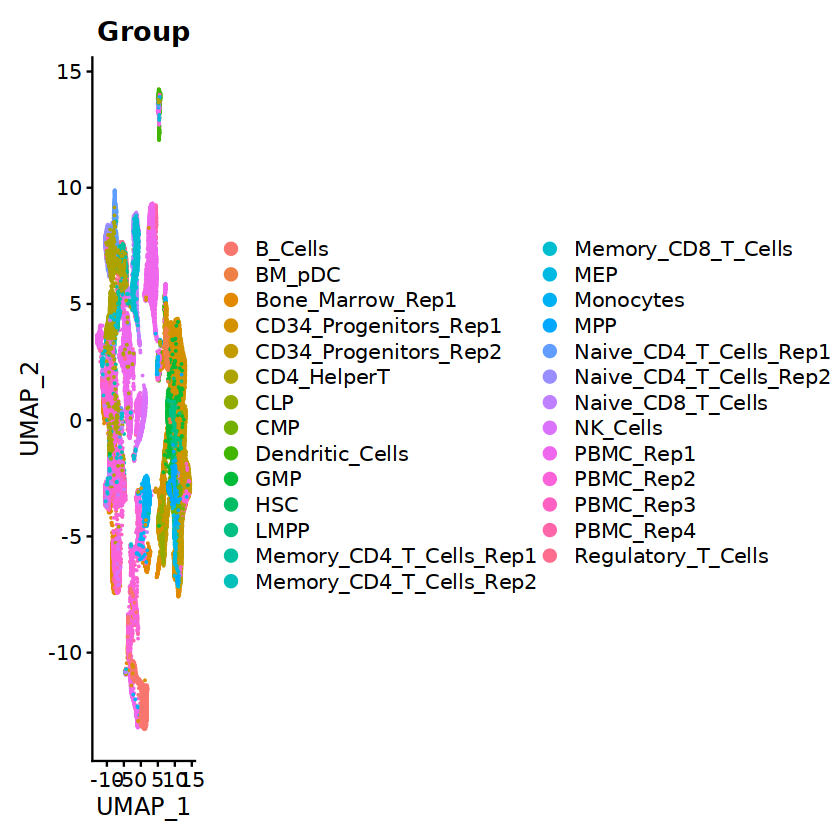

In [17]:
p1

## Run Harmony

In [19]:
library(harmony)

Loading required package: Rcpp



In [20]:
atac <- RunHarmony(
  object = atac,
  group.by.vars = 'Group',
  reduction = 'lsi',
  assay.use = 'peaks',
  project.dim = FALSE
)

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [21]:
embedding = Embeddings(atac[['harmony']])[,2:30] #remove first component

In [22]:
write.csv(embedding, file = 'embedding_harmony.csv')

In [23]:
atac <- RunUMAP(object = atac, reduction = 'harmony', dims = 2:30)

15:13:23 UMAP embedding parameters a = 0.9922 b = 1.112

15:13:23 Read 63882 rows and found 29 numeric columns

15:13:23 Using Annoy for neighbor search, n_neighbors = 30

15:13:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:13:28 Writing NN index file to temp file /tmp/RtmppQPrsA/file4e3e230eb5f80

15:13:28 Searching Annoy index using 1 thread, search_k = 3000

15:13:50 Annoy recall = 100%

15:13:50 Commencing smooth kNN distance calibration using 1 thread

15:13:53 Initializing from normalized Laplacian + noise

15:13:56 Commencing optimization for 200 epochs, with 2758908 positive edges

15:15:04 Optimization finished



In [24]:
p2 <- DimPlot(object = atac, group.by='Group') 

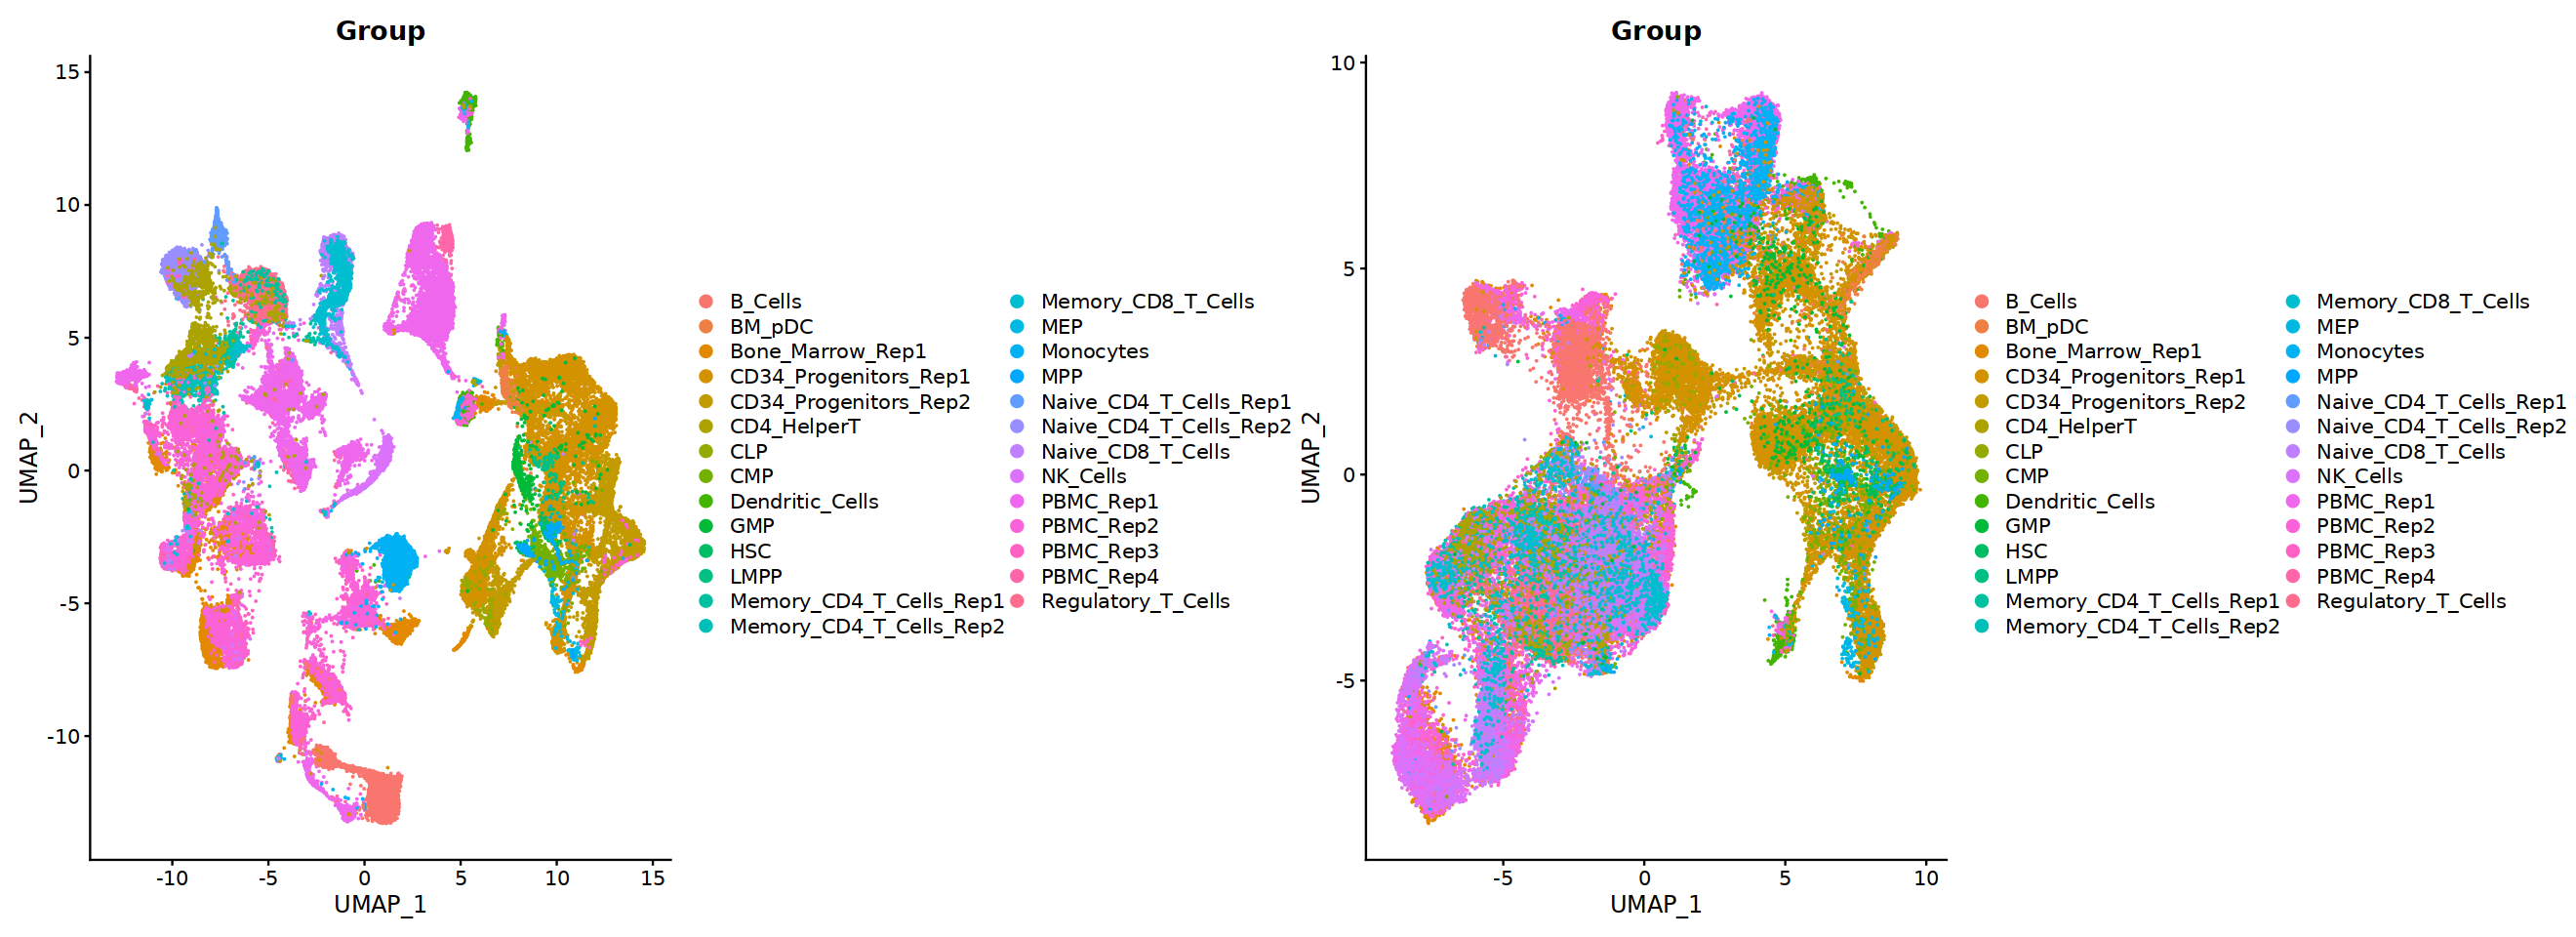

In [27]:
options(repr.plot.width=22, repr.plot.height=8) # figure size
p1 + p2
